In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
time = []
flow = []
tot_1 = []
tot_2 = []
analog_2 = []
with open('B1586024706369.json') as file:
    data = json.load(file)
    for i in np.arange(0,len(data)-1): 
        time.append(data[i]['timeStamp'])
        flow.append(data[i]['idflowmeter'])
        tot_1.append(data[i]['tot1'])
        tot_2.append(data[i]['tot2'])
        analog_2.append(data[i]['analog2'])

In [3]:
flows_data = pd.DataFrame(
    {'Times': time,
     'Total_1' : tot_1,
     'Total_2'  : tot_2,
     'Analog_2' : analog_2
    })

In [12]:
flows_data = flows_data.drop(labels = [27,28,29,30])

In [13]:
flows_data[0:50]

,Times,Total_1,Total_2,Analog_2
0,2018-11-23 07:03:00,0.0,0.0,0.00
1,2018-11-23 07:04:00,0.0,0.0,0.00
2,2018-11-23 07:06:00,0.0,0.0,0.00
3,2018-11-23 07:09:00,0.0,0.0,0.00
4,2018-11-23 07:10:00,0.0,0.0,0.00
5,2018-11-23 07:11:00,0.0,0.0,0.00
6,2018-11-23 07:12:00,0.0,0.0,0.00
7,2018-11-23 07:13:00,0.0,0.0,0.00
8,2018-11-23 07:14:00,0.0,0.0,0.00
9,2018-11-23 07:15:00,0.0,0.0,0.00


In [15]:
#df = flows_data.set_index('Times').resample('1H').pad()
#print (df)
flows_data['Times'] = pd.to_datetime(flows_data['Times'], errors = 'coerce')

In [16]:
flows_data = flows_data.set_index('Times')

In [21]:
 hour_summary1 = flows_data.Total_1.resample('60T').sum()
hour_summary2 = flows_data.Total_2.resample('60T').sum()

# or easier 
# flows_data_resampled = flows_data.resample('60T').sum()

In [31]:
hour_summary1['hour'] = flows_data.Total_1.resample('60T').transform('sum')
hour_summary2['hour'] = flows_data.Total_2.resample('60T').transform('sum')

# flows_data_resampled['hour'] = flows_data.resample('60T').transform('sum')

In [32]:
hour_summary1

Times
2018-11-23 07:00:00                                                    0
2018-11-23 08:00:00                                                 7.05
2018-11-23 09:00:00                                              2726.88
2018-11-23 10:00:00                                              8078.47
2018-11-23 11:00:00                                              10920.5
                                             ...                        
2020-04-01 11:00:00                                            5.864e+07
2020-04-01 12:00:00                                          5.86422e+07
2020-04-01 13:00:00                                          5.86444e+07
2020-04-01 14:00:00                                          8.79685e+06
hour                   Times
NaT                           NaN
2018-1...
Name: Total_1, Length: 11889, dtype: object

In [33]:
hour_summary2

Times
2018-11-23 07:00:00                                                    0
2018-11-23 08:00:00                                                    0
2018-11-23 09:00:00                                                    0
2018-11-23 10:00:00                                                    0
2018-11-23 11:00:00                                                    0
                                             ...                        
2020-04-01 11:00:00                                              -282793
2020-04-01 12:00:00                                              -282793
2020-04-01 13:00:00                                              -282793
2020-04-01 14:00:00                                             -42418.9
hour                   Times
NaT                         NaN
2018-11-...
Name: Total_2, Length: 11889, dtype: object

In [34]:
import matplotlib.pyplot as plt

In [35]:
value_t1 = []
value_t2 = []

flows_data['value_t1'] = flows_data['Total_1'].shift(-1) - flows_data['Total_1']
flows_data['value_t2'] = flows_data['Total_2'].shift(-1) - flows_data['Total_2']
# I1 = range(0, len(flows_data['Total_1'])-1)

# for i in I1:
#    value_t1.append(flows_data['Total_1'][i+1]-flows_data['Total_1'][i])
    
# I2 = range(0, len(flows_data['Total_2'])-1)

# for i in I2:
#    value_t2.append(flows_data['Total_2'][i+1]-flows_data['Total_2'][i])

###############################################################################

# sensor_1 = []
# sensor_2 = []

# I1 = range(0, len(hour_summary1)-1)
# for i in I1:
#     sensor_1.append(hour_summary1[i+1]-hour_summary1[i])
    
# I2 = range(0, len(hour_summary2)-1)
# for i in I2:
#     sensor_2.append(hour_summary2[i+1]-hour_summary2[i])

In [36]:
value_t1 = list(flows_data['value_t1'])[0:-1]
value_t2 = list(flows_data['value_t1'])[0:-1]

In [38]:
flows_kmeans = pd.DataFrame({
    'Number of samples' : np.arange(0,len(value_t1)),
    'Value for sensor 1' : value_t1,
    'Value for sensor 2' : value_t2
})

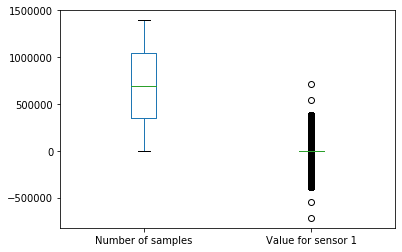

In [42]:
flows_kmeans[['Number of samples', 'Value for sensor 1']].plot(kind='box')

In [43]:
# Convert the flow values to a numpy array
flows_raw1 = flows_kmeans['Value for sensor 1'].values
flows_raw2 = flows_kmeans['Value for sensor 2'].values

In [44]:
# For compatibility with scipy implementation
flows_raw1 = flows_raw1.reshape(-1, 1)
flows_raw1 = flows_raw1.astype('float64')

flows_raw2 = flows_raw2.reshape(-1, 1)
flows_raw2 = flows_raw2.astype('float64')


In [45]:
from sklearn.cluster import KMeans

In [46]:
distortions1 = []
K = range(1,10)
for k in K:
    kMeanModel = KMeans(n_clusters = k)
    kMeanModel.fit(flows_raw1)
    distortions1.append(kMeanModel.inertia_)

In [47]:
distortions2 = []
K = range(1,10)
for k in K:
    kMeanModel = KMeans(n_clusters = k)
    kMeanModel.fit(flows_raw2)
    distortions2.append(kMeanModel.inertia_)

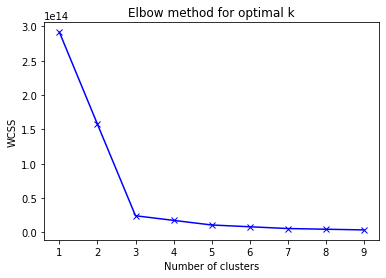

In [48]:
plt.plot(K, distortions1, 'bx-')
plt.title('Elbow method for optimal k')
plt.savefig('ElbowMethod.jpg')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

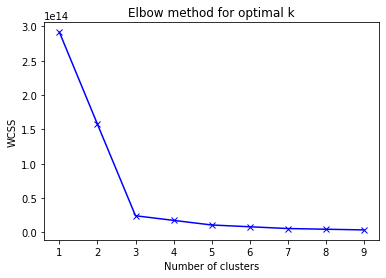

In [49]:
plt.plot(K, distortions2, 'bx-')
plt.title('Elbow method for optimal k')
plt.savefig('ElbowMethod.jpg')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
from scipy.cluster.vq import kmeans, vq

In [51]:
centroids1, avg_distance1 = kmeans(flows_raw1, 3)
centroids2, avg_distance2 = kmeans(flows_raw2, 3)

In [52]:
groups1, cdist1 = vq(flows_raw1, centroids1)
groups2, cdist2 = vq(flows_raw2, centroids2)

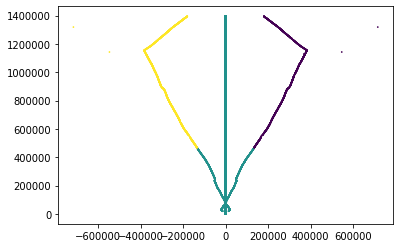

In [54]:
plt.scatter(flows_raw1, np.arange(0,len(flows_raw1)), c=groups1, s=0.5)

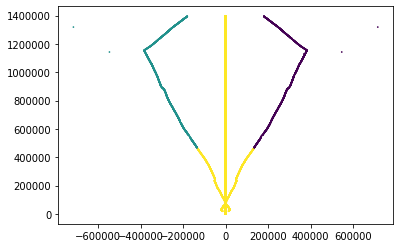

In [56]:
plt.scatter(flows_raw2, np.arange(0,len(flows_raw2)), c=groups2, s=0.5)

In [105]:
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(flows_kmeans)
if_scores = clf.decision_function(flows_kmeans)
if_anomalies=clf.predict(flows_kmeans)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=flows_kmeans[if_anomalies==1]

(array([  3752.,  12088.,   5098.,   8733.,  33275.,  53789., 118754.,
        224141., 388983., 547130.]),
 array([-0.2072665 , -0.17428135, -0.1412962 , -0.10831105, -0.0753259 ,
        -0.04234075, -0.0093556 ,  0.02362955,  0.0566147 ,  0.08959985,
         0.122585  ]),
 <a list of 10 Patch objects>)

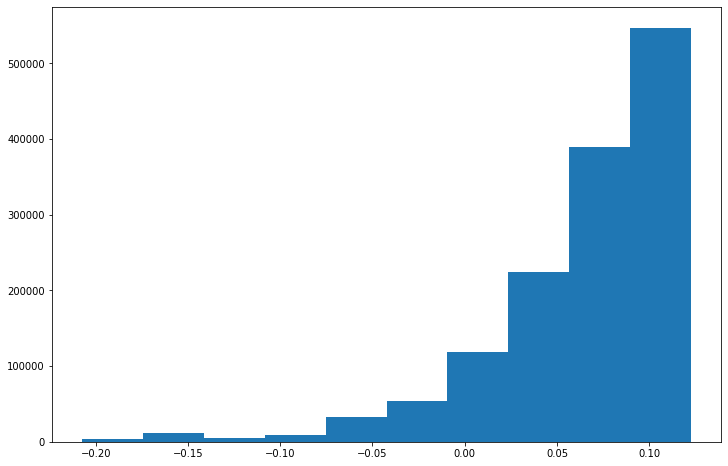

In [106]:
plt.figure(figsize=(12,8))
plt.hist(if_scores)

In [107]:
clf.fit_predict(flows_kmeans)

array([-1, -1, -1, ..., -1, -1, -1])

In [108]:
np.where(clf.fit_predict(flows_kmeans) == 1)

(array([    135,     136,     137, ..., 1395740, 1395741, 1395742],
       dtype=int64),)

In [109]:
np.where(clf.fit_predict(flows_kmeans) == -1)

(array([      0,       1,       2, ..., 1395623, 1395624, 1395630],
       dtype=int64),)

In [110]:
toRemove = np.where(clf.fit_predict(flows_kmeans) == -1)